In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.metrics import confusion_matrix


In [4]:
df = pd.concat([
    pd.read_csv("csvs/second_half_worst.csv", index_col= 0)
])

def visulize_img(row):
    
    img = plt.imread(row.Path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Label: {row.Label}, Pred: {row.Prediction}, Loss: {float(row.loss) :.2f}")
    plt.tight_layout()
    plt.show()

df["Prediction"] = df.pred_true.map({0:"Cat", 1:"Dog"})

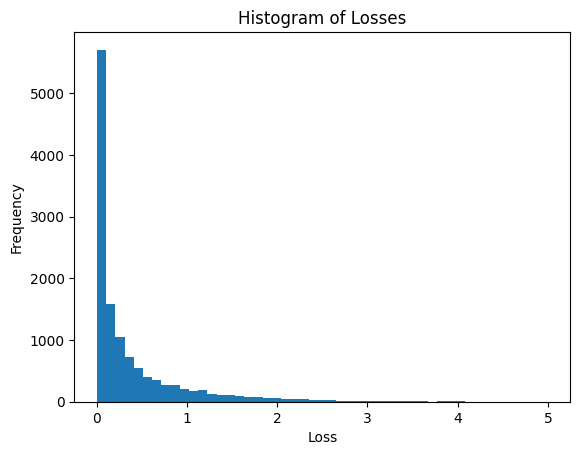

In [5]:
bins = np.linspace(0, 5, 50)  # 50 bins between 0 and 5, but you can adjust the number as desired

df.loss.plot.hist(bins=bins)
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Losses')
plt.show()

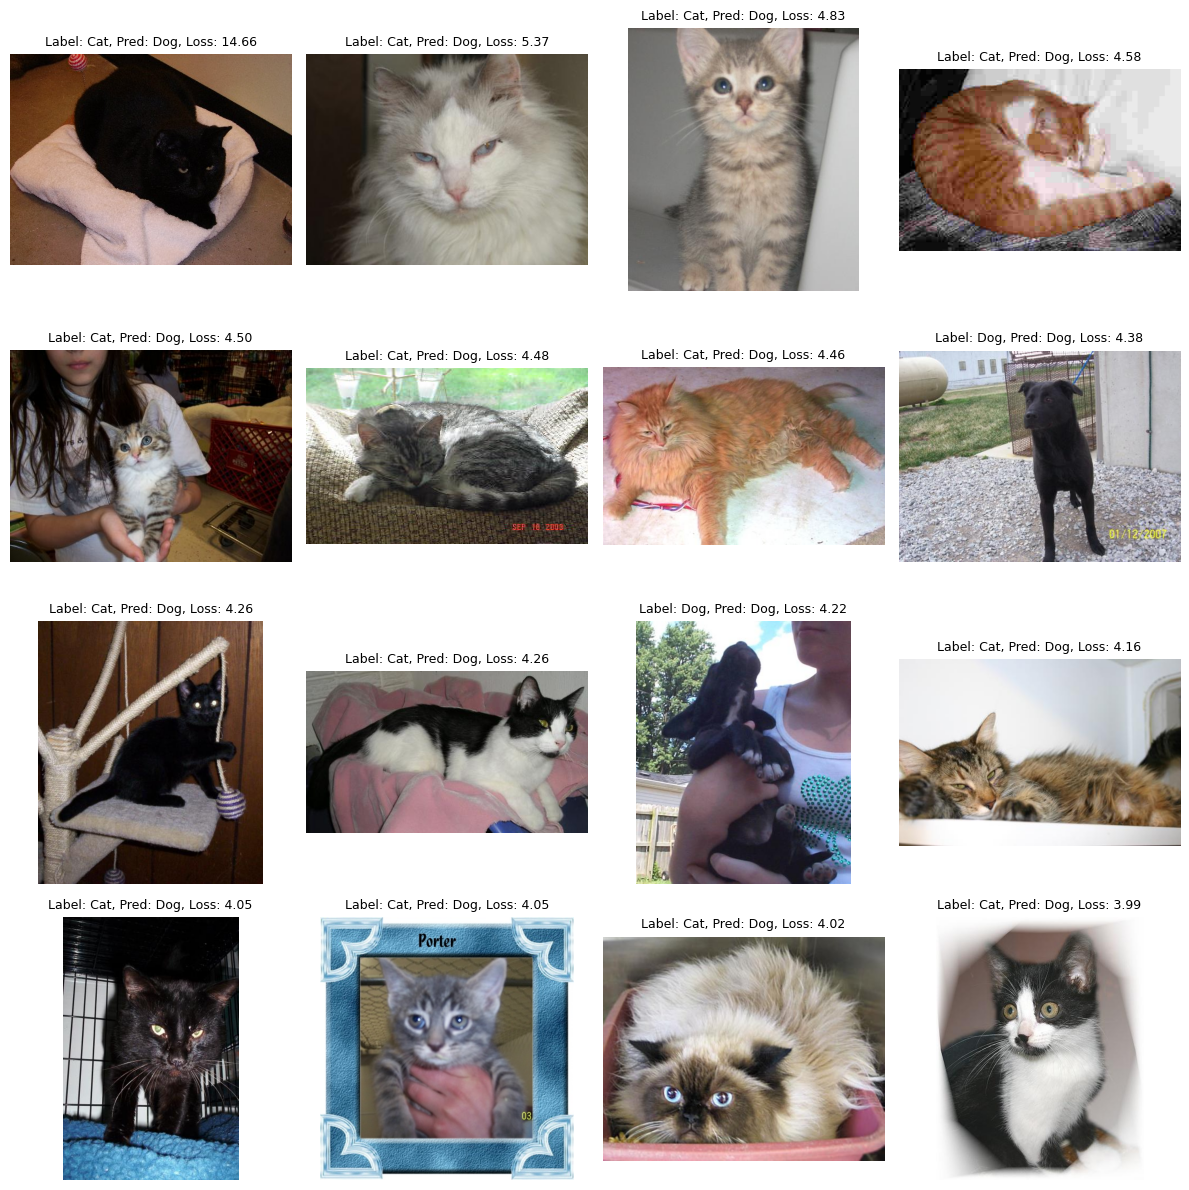

<Figure size 640x480 with 0 Axes>

In [6]:
worst = df.sort_values("loss", ascending= False)

fig, axes = plt.subplots(4, 4, figsize=(12, 12))
for ax in axes.flatten():
    ax.axis("off")

# Iterate through the first 25 rows of the DataFrame and plot images
for i, (index, row) in enumerate(worst.head(16).iterrows()):
    img = plt.imread(row.Path)
    axes[i // 4, i % 4].imshow(img)
    axes[i // 4, i % 4].set_title(
        f"Label: {row.Label}, Pred: {row.Prediction}, Loss: {float(row.loss):.2f}",
        fontsize = 9
        )


plt.tight_layout()
plt.show()
plt.savefig('imgs/worst.png')

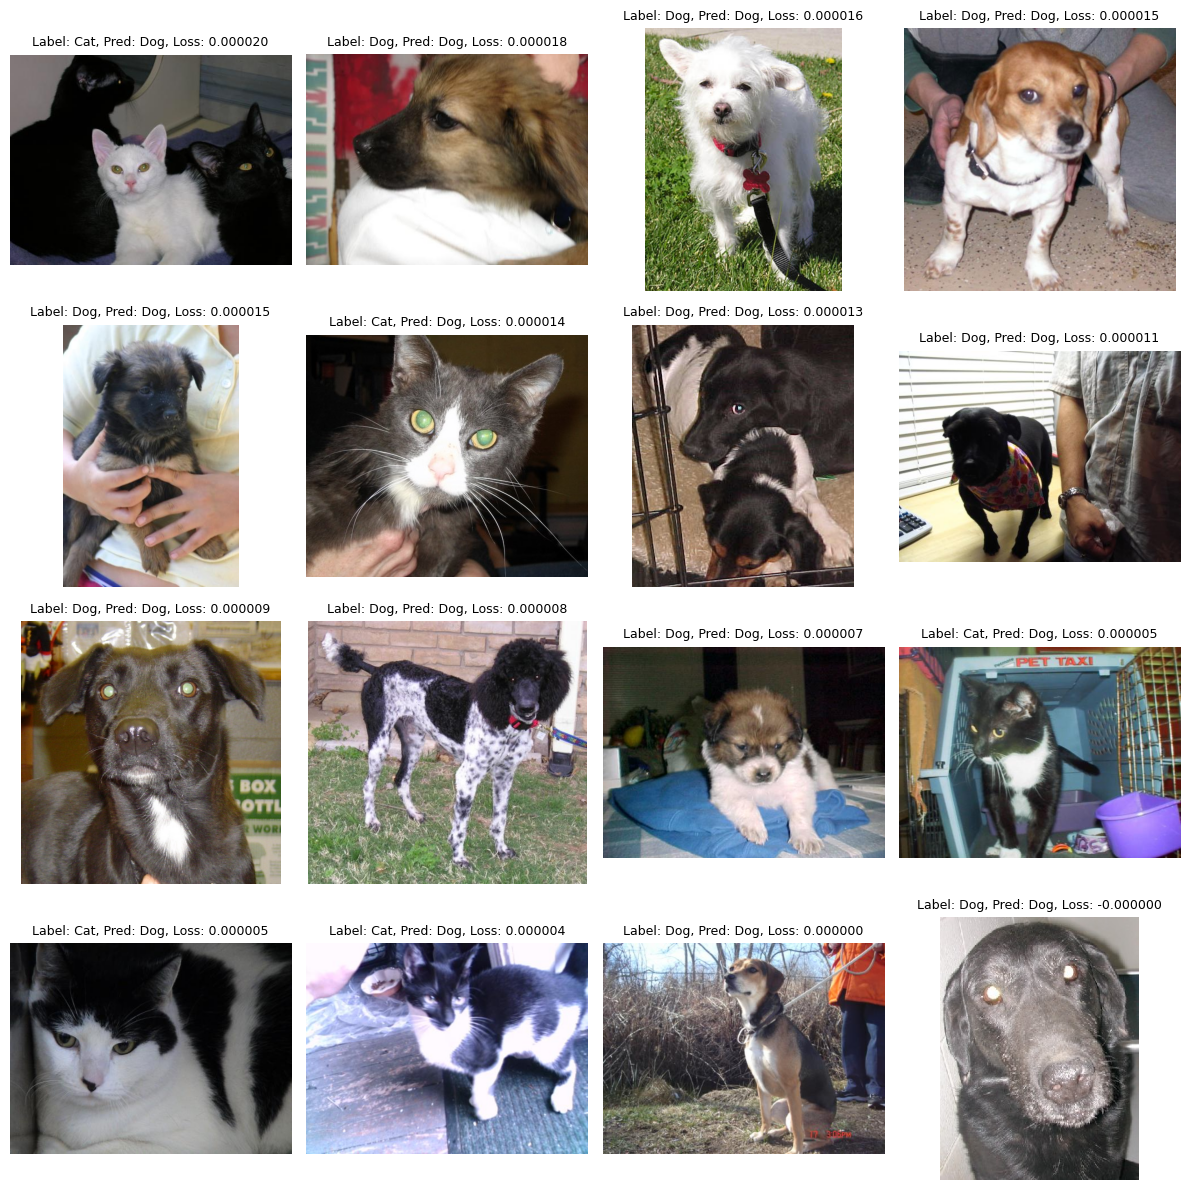

<Figure size 640x480 with 0 Axes>

In [7]:
worst = df.sort_values("loss", ascending= False)

fig, axes = plt.subplots(4, 4, figsize=(12, 12))
for ax in axes.flatten():
    ax.axis("off")

# Iterate through the first 25 rows of the DataFrame and plot images
for i, (index, row) in enumerate(worst.tail(16).iterrows()):
    img = plt.imread(row.Path)
    axes[i // 4, i % 4].imshow(img)
    axes[i // 4, i % 4].set_title(
        f"Label: {row.Label}, Pred: {row.Prediction}, Loss: {float(row.loss):4f}",
        fontsize = 9
        )

plt.tight_layout()
plt.show()
plt.savefig('imgs/best.png')